Tempo: 0.0


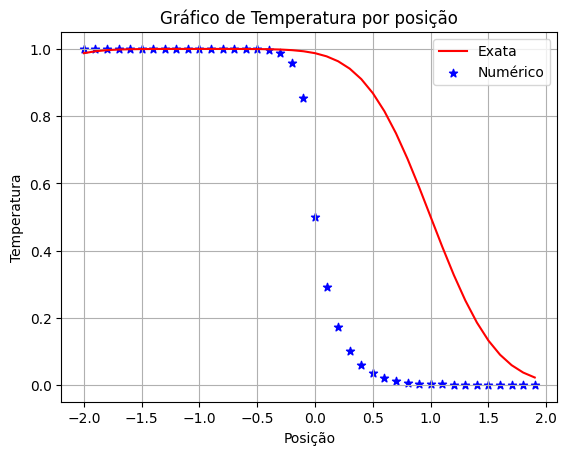

Tempo: 0.1


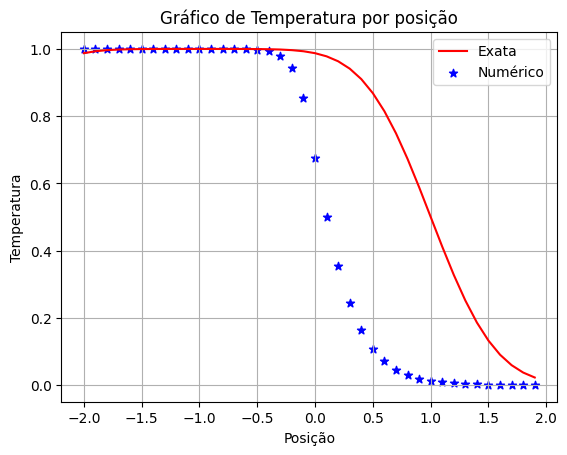

Tempo: 0.2


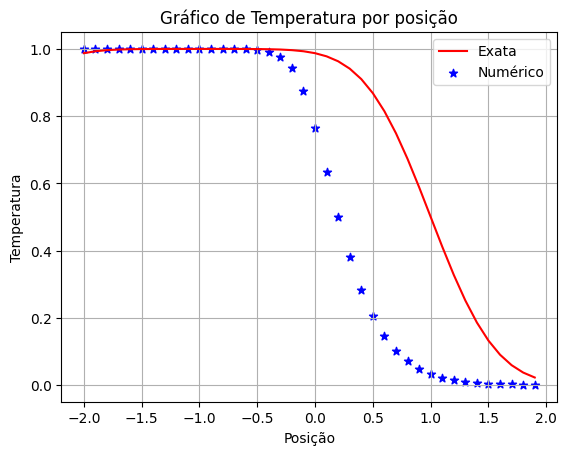

Tempo: 0.3


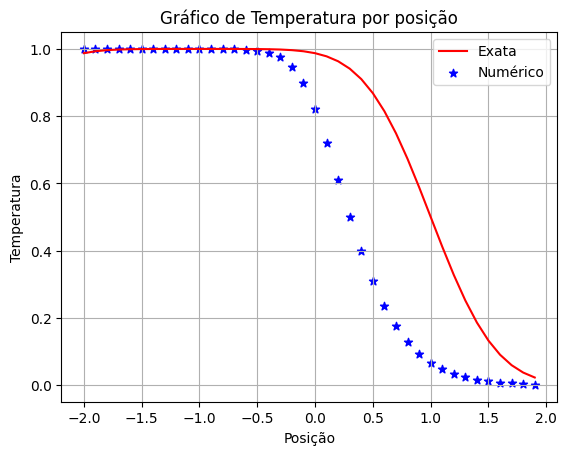

Tempo: 0.4


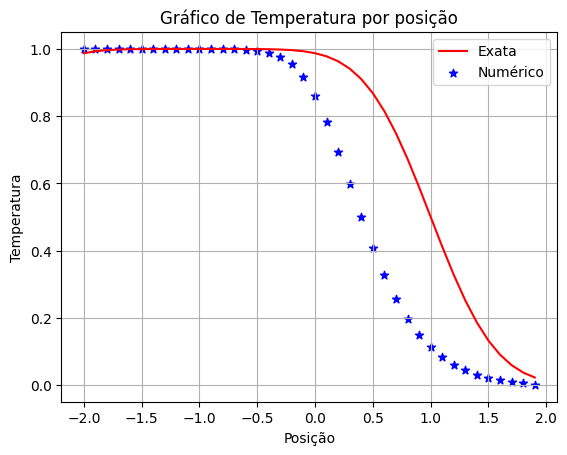

Tempo: 0.5


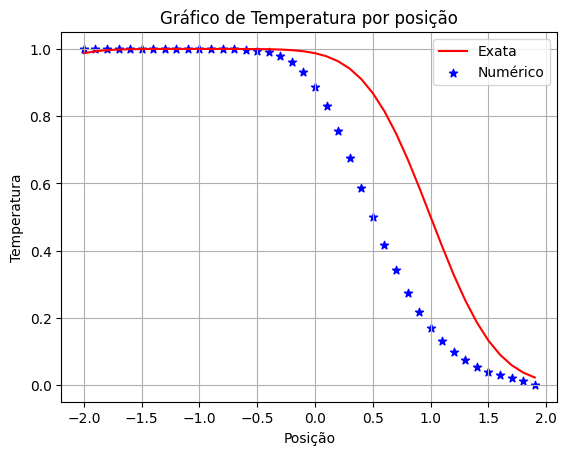

Tempo: 0.6


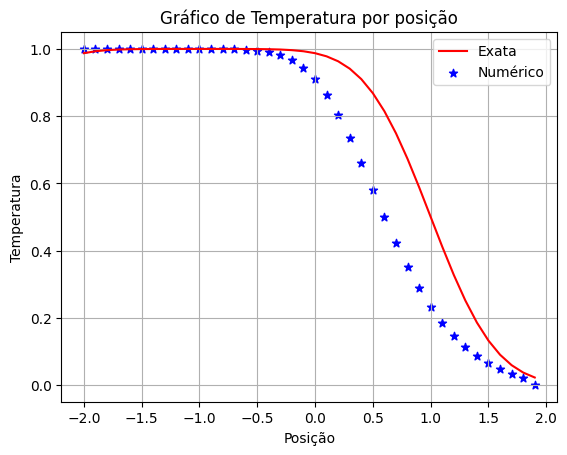

Tempo: 0.7


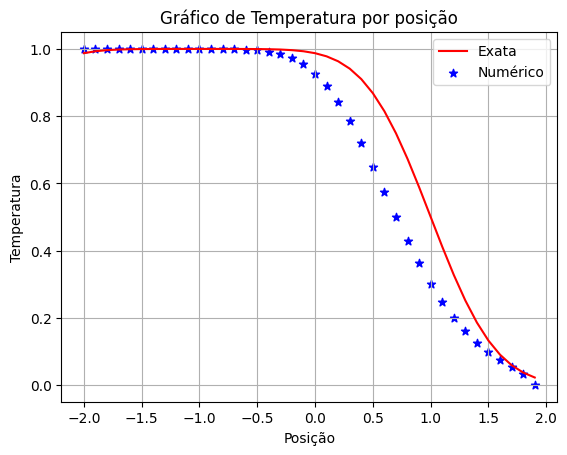

Tempo: 0.8


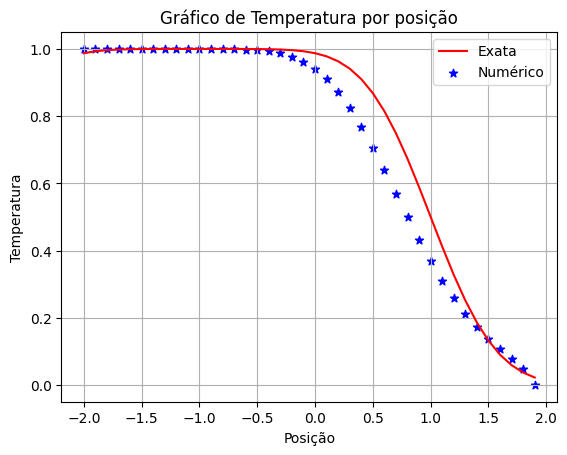

Tempo: 0.9


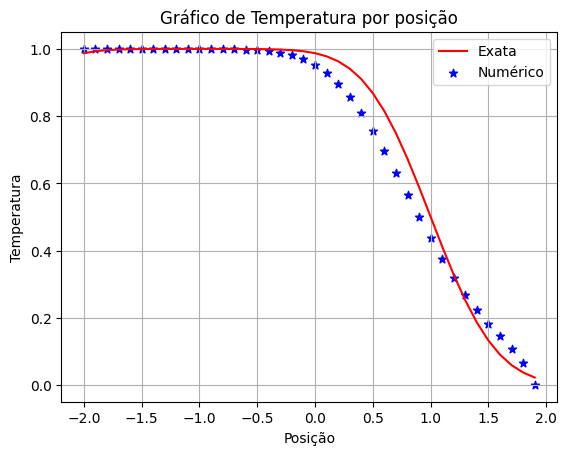

Tempo: 1.0


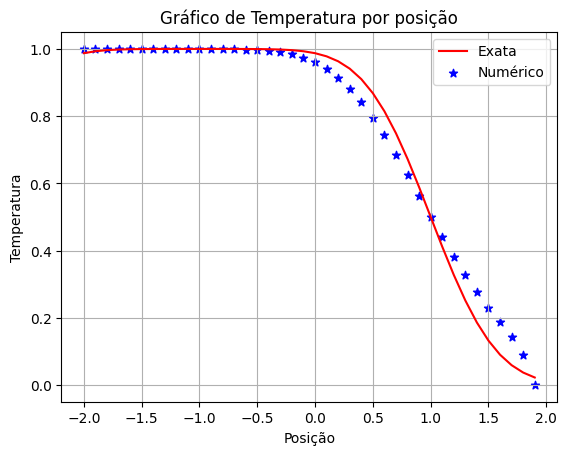

In [7]:
"""
  Trabalho 2 - Métodos Númericos para Equações Diferenciais
  Aluno: Victor Luis Teixeira Reis - 202110049511
"""

from math import *
import numpy as np
import matplotlib.pyplot as plt

def initial_condition(x):
  if x < 0:
    return 1.0
  else:
    return 0.0

def analytic_solution (x, t):
  serie_length = 1000
  partial_sum = 0.0

  for k in range (1, serie_length+1):
    partial_sum += (1/(2*k-1))*exp((-alpha*((2*k-1)**2)*(pi**2)*t)/(L**2))*sin((2*k-1)*((pi*(x-u*t))/L))

  return 0.5 - (2/pi)*partial_sum

def plot_graph (aprox_solution):
  x = np.arange(X_1, X_2, delta_x)

  plt.plot(x, [analytic_solution(each_x, final_t) for each_x in x], label="Exata", color="red")
  plt.scatter(x, aprox_solution, label="Numérico", color="blue", marker="*")

  plt.xlabel('Posição')
  plt.ylabel('Temperatura')
  plt.title('Gráfico de Temperatura por posição')
  plt.grid(True) 
  plt.legend()
  plt.show()

def tdma(a, b, c, temperature, size):
  d = np.array([0.0 for _ in range(size)])
  new_temperature = np.array([0.0 for _ in range(size)])
  p = np.array([0.0 for _ in range(size)])
  q = np.array([0.0 for _ in range(size)])
  
  d[0] = temperature[0]
  d[size-1] = temperature[size-1]

  for j in range(1, size-1):
    d[j] = (1-beta)*((1-gama)*C+S)*temperature[j-1] + (1-(1-beta)*((1-2*gama)*C+2*S))*temperature[j] - (1-beta)*(-gama*C+S)*temperature[j+1]

  # Condições de contorno
  p[0] = 0.0
  q[0] = T_1
  p[size-1] = 0.0
  q[size-1] = T_2

  for j in range(1, size-1):
    p[j] = b[j] / (a[j] - c[j]*p[j-1])
    q[j] = (d[j] + c[j]*q[j-1]) / (a[j] - c[j]*p[j-1])

  new_temperature[size-1] = q[size-1]

  for j in range(size-2, -1, -1):
    new_temperature[j] = p[j]*new_temperature[j+1] + q[j]

  return new_temperature
    
def solve_partial_equation(final_t):
  temperature = np.array([initial_condition(x) for x in np.arange(X_1, X_2, delta_x)])
  size = len(temperature)

  # Expressões que calculam os elementos aj, bj, cj,
  a_j = 1 + beta*((1-2*gama)*C + 2*S)
  b_j = beta*(-gama*C + S)
  c_j = beta*((1-gama)*C + S)

  a = np.array([a_j for _ in range(size)])
  b = np.array([b_j for _ in range(size)])
  c = np.array([c_j for _ in range(size)])

  for j in np.arange(0.0, final_t+delta_t, delta_t):
    print(f'Tempo: {j:.1f}')

    temperature = tdma(a, b, c, temperature, size)

    plot_graph(temperature)

  return temperature

#####################################################################
#  Variáveis Globais
#####################################################################

u = 1.0 # Velocidade de advecção
alpha = 0.1 # Difusividade térmica
delta_x, delta_t = 0.1, 0.1

C = (u*delta_t)/delta_x
S = (alpha*delta_t)/(delta_x**2)

beta, gama = 1.0, 0.0

T_1 = 1.0
T_2 = 0.0

X_1 = -2.0
X_2 = 2.0

L = X_2 - X_1

final_t = 1.0

aprox_solution = solve_partial_equation(final_t)

